# Facial Keypoints Detection - baseline 

#### Don Moon - Lester Yang - Shwetha Chitta Nagaraj

### Introduction

The task of Facial Keypoints Detection is given an image of a human face for example, a machine learning model analyzes and detects facial keypoints like centers of the eyes, corners of eyes, tip of nose, corners of lips etc. This kind of detection finds lot of applications like:
* Medical diagnosis of facial disfigurement
* Tracking line of sight
* Analyzing facial expressions
* Face tracking in videos
* Biometrics/ face recognition
* Snapchat

Along with a wide variety of applied needs, ddetecting facial keypoints is a challening problem as the images can come with a lot of variations like pose, size, facial expressions, viewing angle, illumniation conditions etc. 

Our primary motivation for the W207 Final project is to learn and apply deep learning modeling techniques to widely significant applications with relevant uses and the Kaggle Facial Keypoints Detection challenge would give us the opportunity to learn and experiment with many advanced approaches associated with Convolutional Neural Networks.

The goal with the [Kaggle dataset](https://www.kaggle.com/c/facial-keypoints-detection/overview/description) is to predict a set of x, y co-ordinates for each facial keypoint in the pixelated image of a given set of 2-D images of human faces. It is required to use $Root Mean Square Error(RMSE)$ to measure the accuracy of the models developed. 


$$ RMSE = \sqrt{\frac{1}{n}. \sum_{i=1}^{n}{(y_i - \hat{y_i})^2}} $$

where $y_i$ is the original value and $\hat{y_i}$ is the predicted value for $n$ given examples. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
from tensorflow import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import backend as K

print("tensorflow version {}".format(tf.__version__))
print("keras version {}".format(keras.__version__))

tensorflow version 1.15.2
keras version 2.2.4-tf


### Load the datasets

In [11]:
# Load given train and test datasets
train_data = pd.read_csv("../data/training/training.csv")
test_data = pd.read_csv("../data/test/test.csv")

### Exploratory Data Analysis

In [12]:
# Describe the train data
train_data.head().T 

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [13]:
# Check train data dimensions
print(" Number of examples/images in train data: ", train_data.shape[0]) # 7049 examples or images

 Number of examples/images in train data:  7049


The train data has 7049 examples or images, each with 15 facial key points along x and y co-ordinates. Image consists of row-ordered pixel values separated by space.

So now the image data will our input and the facial keypoint coordinates for the 15 facial keypoints will be labels to predict.

Loading Images...


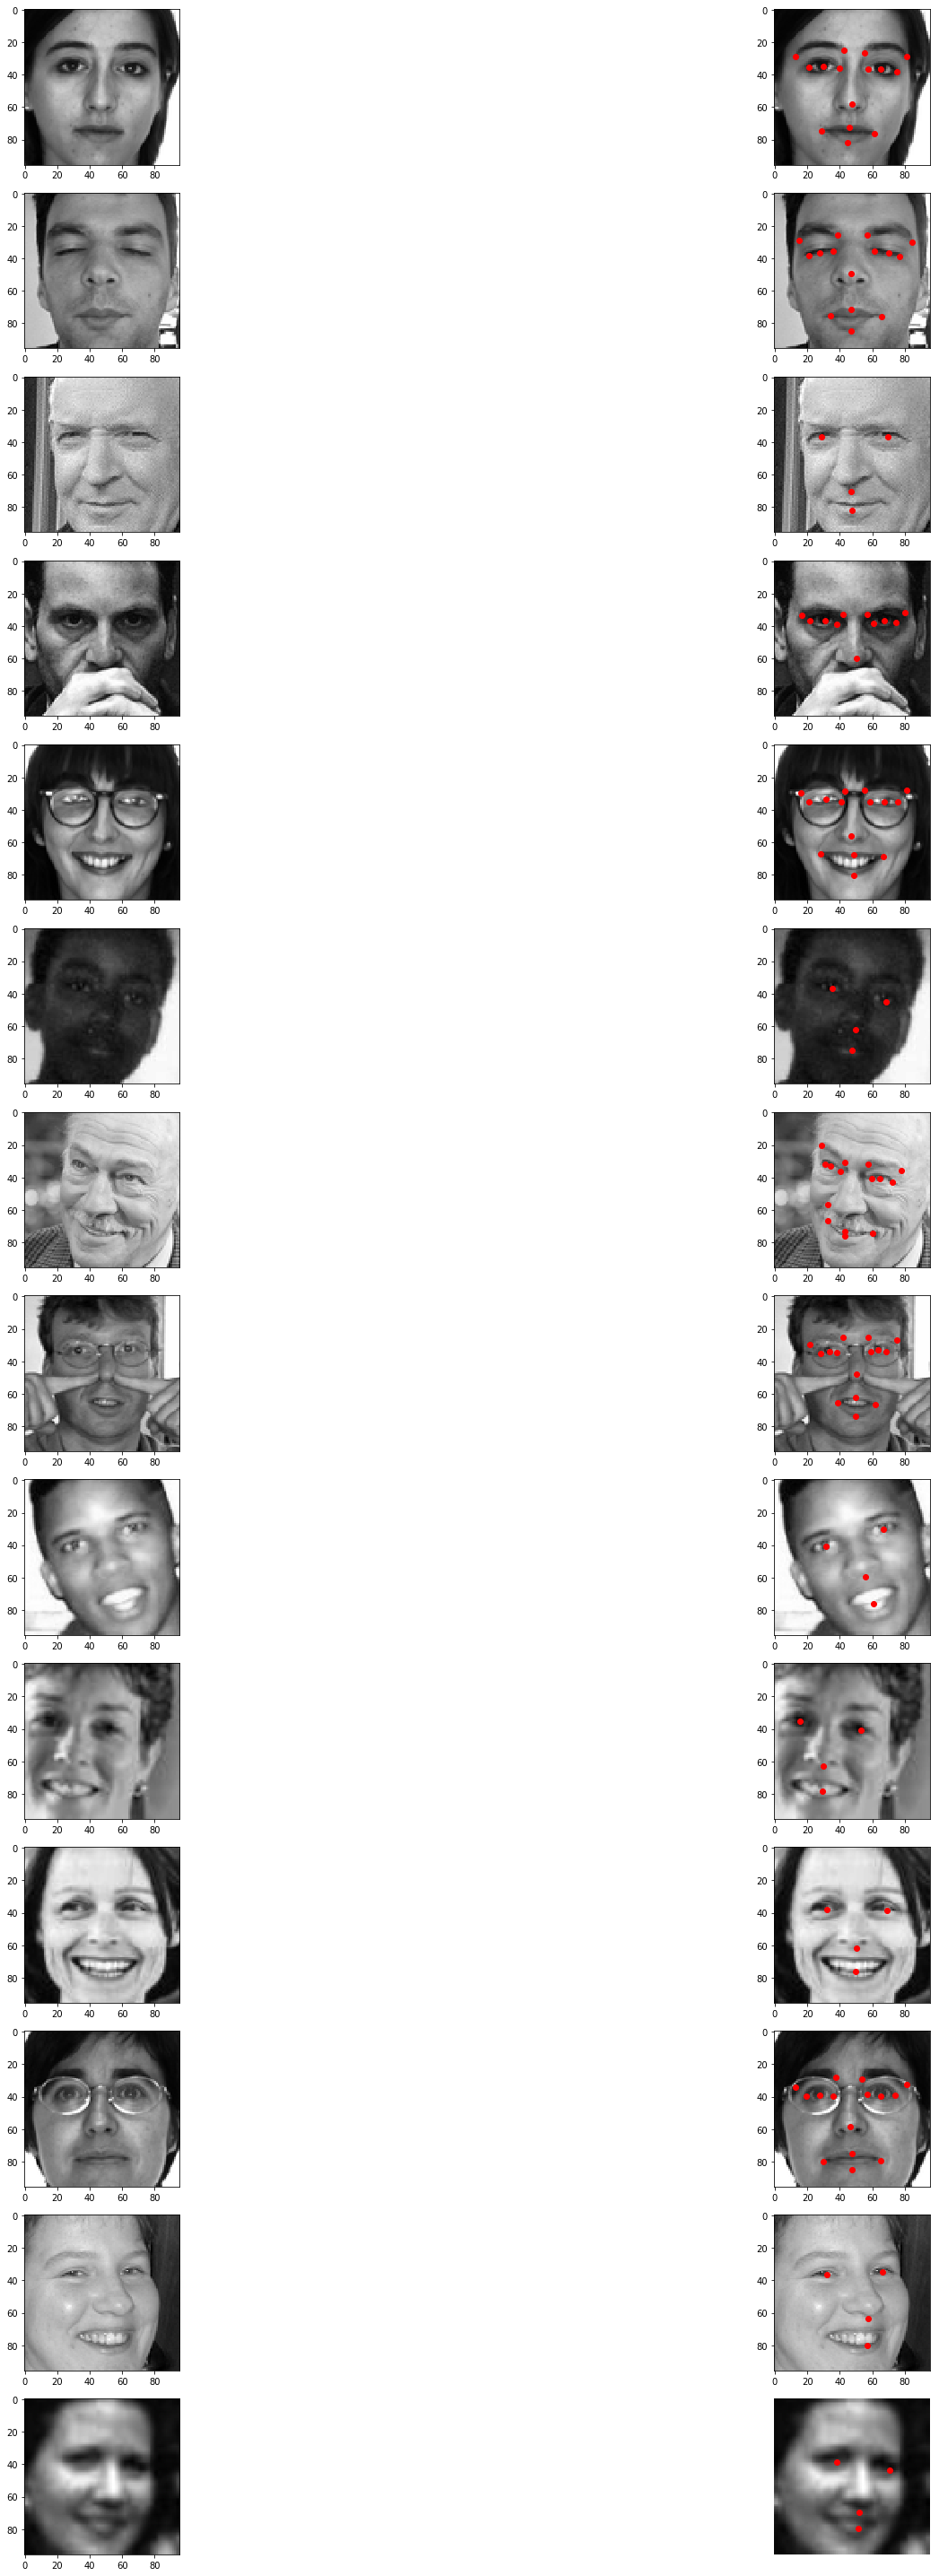

In [14]:
# Display random images with corresponding keypoints from train data
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

# Randomly display 10 images
num_examples = 14
num_columns = 2
#idx = np.random.choice(train_data.index, size = 5, replace=False)
idx =[1563, 66, 5628, 2154, 1233, 5149, 1908, 88, 2885, 4927, 4797, 1266, 3473, 3668]
images = train_data.loc[idx]['Image']
keypoints_list = list(train_data)[:-1]
keypoints = train_data.loc[idx][keypoints_list]
fig, axcs = plt.subplots(figsize=(40, 40), nrows=14, ncols=2)

print("Loading Images...")
for j, (string, (iloc, keypoint)) in enumerate(zip( images, keypoints.iterrows())):
        xy = keypoint.values.reshape((15, 2))
        axcs[j, 0].imshow(string2image(string), cmap='gray')
        axcs[j,1].imshow(string2image(string), cmap='gray')
        axcs[j,1].plot(xy[:, 0], xy[:, 1], 'ro')
        plt.axis('off')
        plt.tight_layout()

From the images above we can see:
* Not all images have all the 15 keypoints
* Differences in image resolution(blurred, contrast, cropped)
* Different poses and expressions(eyes closed, angles, mouth closed, mouth open)
* Different illumination conditions


In [15]:
# Display count of available values for each facial key point coordinate
print(train_data.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

It seems like the facial keypoints are not labeled consistently for all the 7049 examples(images) in the train data.


#### Missing Data

In [16]:
# How many facial key points have no data
print("Count of facial key points with missing coordinates:")
print(train_data.isnull().any().value_counts())

Count of facial key points with missing coordinates:
True     28
False     3
dtype: int64


So there are 28 columns with missing data. 3 of them have all the data. Let's check more details.

In [18]:
# Check count of missing data fpr all 15 facial keypoints
train_data.isnull().sum().sort_values(ascending=False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

Except for nose_tip facial key point and the image data, rest of the keypoints have data missing. 


Text(0.5, 1.0, 'Counts for each facial keypoint')

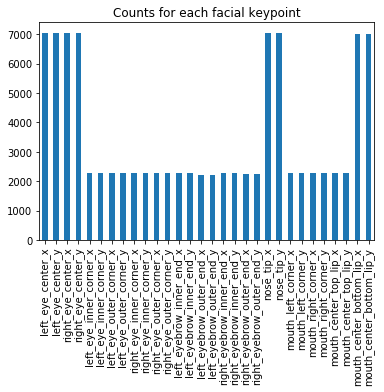

In [19]:
# Plot the distribution of the counts for each keypoint
train_data.describe().loc['count'].plot.bar()
plt.title('Counts for each facial keypoint')

The above plot indicates that in the Kaggle training dataset, only around 2000 images can be called as "high quality" as they have details of all the 15 facial keypoints. The rest which is around 5000 images can be called as "low-quality" with only 8 facial keypoints labelled. The below histogram makes this clear.

Text(0.5, 1.0, 'Counts of Missing values for each keypoint')

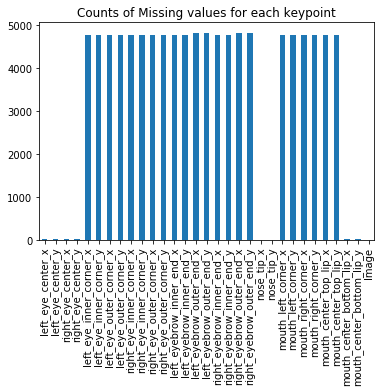

In [20]:
# Plot the distribution of the missing values for each keypoint
train_data.isnull().sum().plot.bar()
plt.title('Counts of Missing values for each keypoint')

Here it is clear that out of the 30 labels, labels for below 4 facial key points are available across all 7049 images in Kaggle training dataset:
* left_eye_center
* right_eye_center
* nose_tip
* mouth_center_bottom_lip 

The remaining 11 facial keypoints have labels that are available across only around 2000 records.
This observation could influence how we treat our modeling datasets.


#### Facial Keypoints distribution

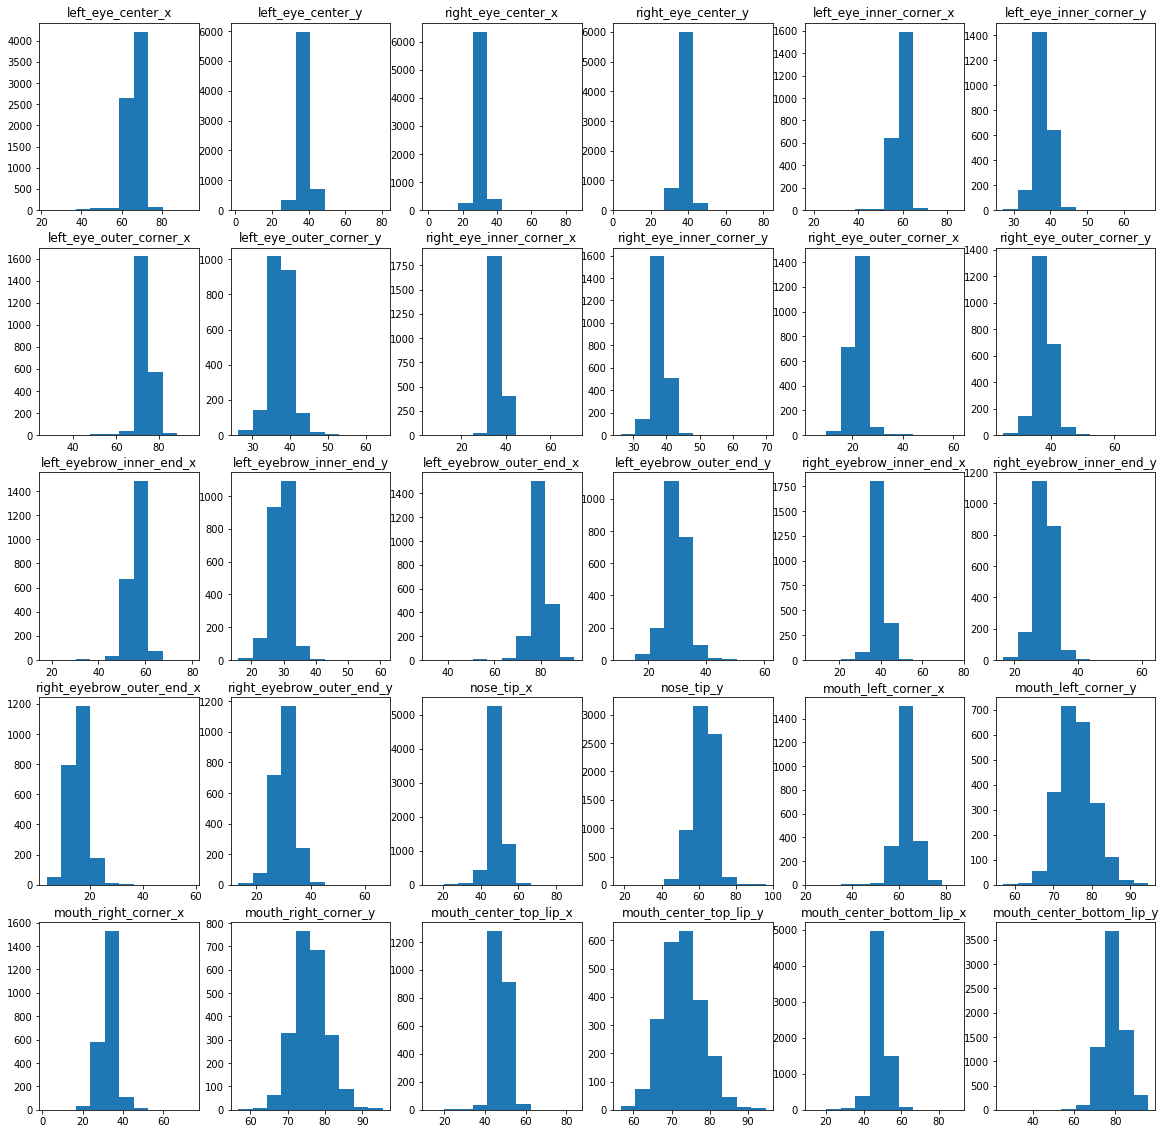

In [21]:
# Plot the distributions of the keypoints in train data
columns = list(train_data.columns.values)
fig, axcs = plt.subplots(figsize=(20, 20), nrows = 5, ncols = 6)

i = 0
for ax in axcs:
    for col in ax:
        col.hist(train_data[columns[i]].dropna())
        col.set_title(columns[i])
        i +=1
        
plt.show()

From the histograms above we can observe that most of the keypoints have values grouped around the same values but we see more variation with $mouth$ keypoints. This could be due to mouth being open, closed, covered etc. which we saw in some of the images above.

Let's take a closer look at these distributions through scatter plots for each of the 15 facial key points to identify outliers from the images.

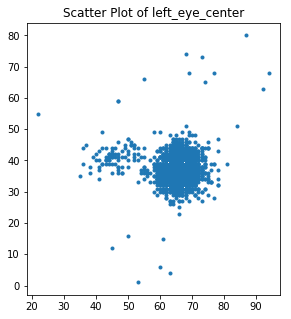

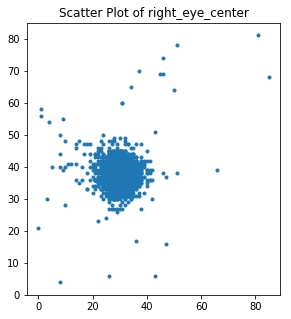

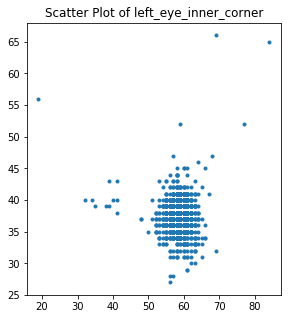

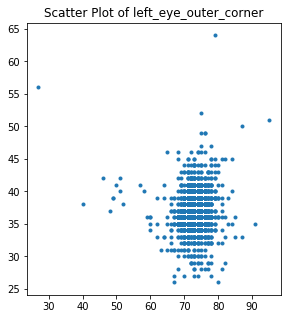

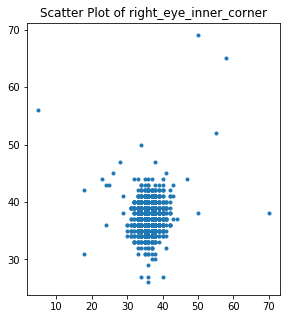

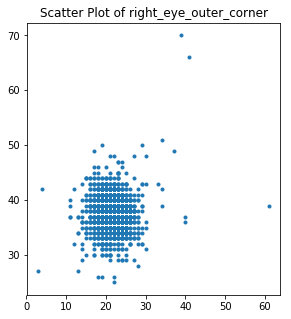

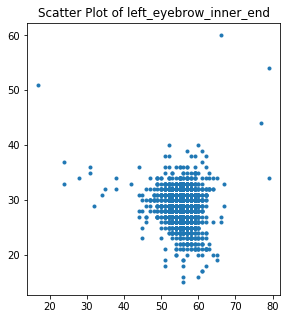

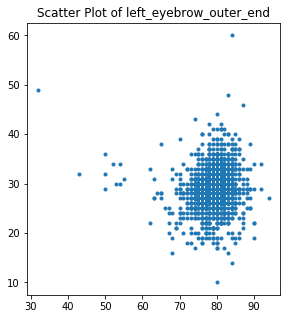

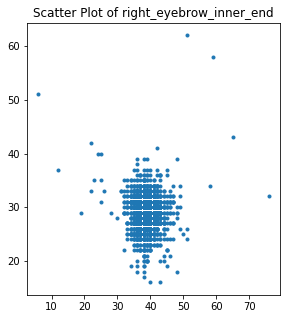

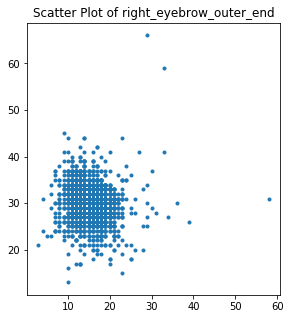

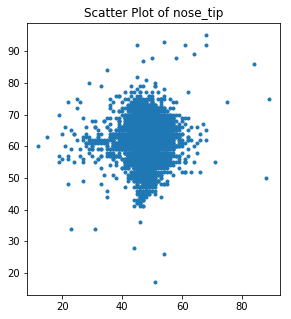

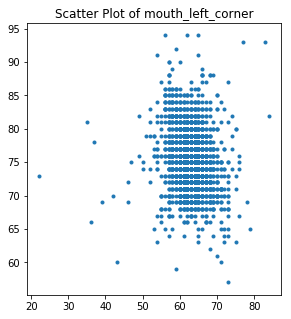

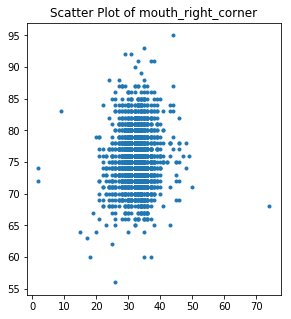

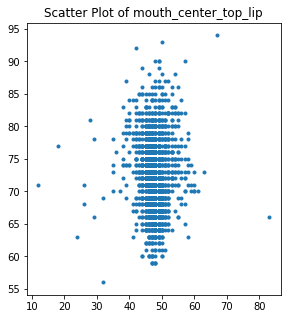

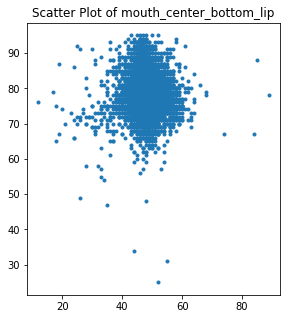

In [22]:
# Scatter plot of all the 15 keypoints(x, y co-ordinates)
columns = list(train_data.columns.values)
for i in range(0, 30, 2):
    # Scatter plot for each feature along x and y co-ordinates
    plt.figure(figsize=(10, 5))
    axes = plt.subplot(1, 2, 1)
    #axes = plt.subplots(figsize=(20, 20), nrows = 5, ncols = 3)
    axes.scatter(x=train_data[columns[i]].dropna().astype('int8'), y=train_data[columns[i+1]].dropna().astype('int8'), marker= '.')
    axes.set_title(('Scatter Plot of '+ columns[i][:-2]))
    
plt.show()



From the scatterplots of the keypoint co-ordinates we can see that they are mostly clustered around a smaller region along with some outliers.   

Also as a final step let's make sure there are no duplicates.

In [23]:
#Check for any duplicate images
train_data_no_image = train_data.drop(['Image'], axis = 1)

duplicate_images = train_data_no_image[train_data_no_image.duplicated()]
print("Number of duplicate images:", len(duplicate_images))

Number of duplicate images: 0


### Data Pre-processing

#### Train and Dev Data Split

To proceed further let's split the Kaggle train data into train and dev datasets with a 80:20 split.

In [24]:
# First convert the image pixels into numpy array
image_list = []
for i in range(train_data.shape[0]):
    pixel_list = train_data['Image'][i].split(' ')
    pixel_list = ['0' if j == '' else j for j in pixel_list]
    image_list.append(pixel_list)   


##### Normalize the pixel values

The example images have pixel values between 0 and 255. Lets scale these values by normalizing them between 0 and 1. This will help with accuracy of the trained models.  

In [25]:
X_master = np.array(image_list, dtype = 'float')
print("Dimensions and values before normalization:")
print("X_master.shape = {}, X_master.min = {:.3f}, X_master.max = {:.3f}"
      .format(X_master.shape, X_master.min(), X_master.max()))


Dimensions and values before normalization:
X_master.shape = (7049, 9216), X_master.min = 0.000, X_master.max = 255.000


In [26]:
# Normalize pixel values of images between 0 and 1
X_master = X_master / 255
print("X_master.shape = {}, X_master.min = {:.3f}, X_master.max = {:.3f}"
      .format(X_master.shape, X_master.min(), X_master.max()))

X_master.shape = (7049, 9216), X_master.min = 0.000, X_master.max = 1.000


##### Scale the values of x and y coordinates for the facial keyoints labels

Scaling the coordinates beween -1 and 1 with 0 being the center, since some of the popular activation functions used in our CNN models like relu work best in this range.

In [27]:
# Scale x and y cooridnates of keypoints to be between -1 and 1
keypoints = train_data.drop('Image', axis = 1)
Y_master = (keypoints - 96/2) / (96/2)
Y_master = np.array(Y_master, dtype = 'float')


##### Data split

In [28]:
# Split image examples and facial keypoints labels into train and dev datasets using 80:20 split
X_train, X_dev, Y_train, Y_dev = train_test_split(X_master, Y_master, test_size=0.2, random_state=42, shuffle=True)
print("X_Train: " + str(X_train.shape) + " Y_Train: " + str(Y_train.shape))
print("X_Dev: " + str(X_dev.shape) + " Y_dev: " + str(Y_dev.shape))
 

X_Train: (5639, 9216) Y_Train: (5639, 30)
X_Dev: (1410, 9216) Y_dev: (1410, 30)


#### Handling Missing Data

As we noticed missing data for certain facial keypoints, we will remove them in both the train and dev datasets. This will leave us with 30% of the original amount of images for modeling. This is not ideal so it requires us to work on strategies to compensate for the missing data. 

In [29]:
# Now remove the rows with missing data in both train and dev datasets
X_train_trim = X_train[~np.isnan(Y_train).any(axis=1)]
Y_train_trim = Y_train[~np.isnan(Y_train).any(axis=1)]
X_dev_trim = X_dev[~np.isnan(Y_dev).any(axis=1)]
Y_dev_trim = Y_dev[~np.isnan(Y_dev).any(axis=1)]

In [31]:
# Show the dimensions of the new train and dev datasets
print("X_train_trim.shape = {}, Y_train_trim.shape = {}"
      .format(X_train_trim.shape, Y_train_trim.shape))
print("X_dev_trim.shape = {}, Y_dev_trim.shape = {}"
      .format(X_dev_trim.shape, Y_dev_trim.shape))
print(X_dev_trim.shape)
print(Y_dev_trim.shape)

X_train_trim.shape = (1692, 9216), Y_train_trim.shape = (1692, 30)
X_dev_trim.shape = (448, 9216), Y_dev_trim.shape = (448, 30)
(448, 9216)
(448, 30)


So now we have a train dataset with 1692 examples each with 9216(96X96) pixel values along with corresponding 30 labels for the facial keypoints.
Dev dataset has 448 images with 96X96 pixel values for each of which we have to predict 30 keypoint labels.

#### Check Kaggle Test data for submission

In [32]:
# Check test data dimensions
test_data.shape # 1783 test examples or images

(1783, 2)

In [33]:
test_data.head().T # Each example contains ImageId and image data with row-ordered list of pixel values

,0,1,2,3,4
ImageId,1,2,3,4,5
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


### Development Environment

- AWS EC2 p2.xlarge instance
    - Ubuntu 18.04 
    - Tensorflow 1.15.2
    - Keras 2.2.4-tf

- Google Colab
    - Tensorflow 2.1.0

### Baseline Model

Convolutional Neural Networks are well known in image processing applications like image classification, object detection and recognition.

As compared to Neural Networks where every neuron in one layer is connected to every neuron with next layer we will have a large amount of neurons and parameters especially while handling images. 

CNNs use a small filter that scans through image to find the weights for the small filter. This way the number of parameters to be learnt becomes manageable while retaining high expresiveness while processing large sets of images.

We will model a simple CNN as oue baseline model with 1 convoluted layer and 1 fully connected layer. We will use the trimmed datasets without the missing values. 

In [34]:
# reshape data for CNN input
X_train_trim = X_train_trim.reshape(-1,96,96,1)
X_dev_trim = X_dev_trim.reshape(-1,96,96,1)

In [35]:
# Single Layer CNN
np.random.seed(533)

# create baseline CNN model with 1 convoluted layer with relu activation
# input is 96X96 pixel images with 1 channel(gray scale) -> (96, 96, 1) tensors
# applies 10 convolution filters of 3X3 each
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# Helper function to find RMSE(Root Mean Squared Error)
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model for the learning process
# 'adam' optimizer is used
model.compile(loss=rmse, optimizer='adam', metrics=[rmse])

# fit model with 100 epochs and batch size = 32 and using dev dataset as validation set
%time history_cnn = model.fit(X_train_trim, Y_train_trim, epochs=100, shuffle=True, batch_size=32, validation_data=(X_dev_trim, Y_dev_trim), verbose=2)

# Summary of trained model
model.summary()





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1692 samples, validate on 448 samples
Epoch 1/100





 - 8s - loss: 0.8823 - rmse: 0.8823 - val_loss: 0.1536 - val_rmse: 0.1536
Epoch 2/100
 - 1s - loss: 0.1257 - rmse: 0.1257 - val_loss: 0.1201 - val_rmse: 0.1201
Epoch 3/100
 - 1s - loss: 0.1056 - rmse: 0.1056 - val_loss: 0.0889 - val_rmse: 0.0889
Epoch 4/100
 - 1s - loss: 0.0779 - rmse: 0.0779 - val_loss: 0.0729 - val_rmse: 0.0729
Epoch 5/100
 - 1s - loss: 0.0587 - rmse: 0.0587 - val_loss: 0.0688 - val_rmse: 0.0688
Epoch 6/100
 - 1s - loss: 0.0499 - rmse: 0.0499 - val_loss: 0.0590 - val_rmse: 0.0590
Epoch 7/100
 - 1s - loss: 0.0451 - rmse: 0.0451 - val_loss: 0.0586 - val_rmse: 0.0586
Epoch 8/100
 - 1s - loss: 0.0403 - rmse: 0.0403 - val_loss: 0.0580 - val_rmse: 0.0580
Epoch 9/100
 - 1s - loss: 0.0354 - rmse: 0.0354 - val_loss: 0.0545 - val_rmse: 0.0545
Epoch 10/100
 - 1s - loss: 0.0345 - rmse: 0.0345 - val_loss: 0.0578 - val

Epoch 60/100
 - 1s - loss: 0.0156 - rmse: 0.0156 - val_loss: 0.0535 - val_rmse: 0.0535
Epoch 61/100
 - 1s - loss: 0.0161 - rmse: 0.0161 - val_loss: 0.0562 - val_rmse: 0.0562
Epoch 62/100
 - 1s - loss: 0.0151 - rmse: 0.0151 - val_loss: 0.0535 - val_rmse: 0.0535
Epoch 63/100
 - 1s - loss: 0.0149 - rmse: 0.0149 - val_loss: 0.0538 - val_rmse: 0.0538
Epoch 64/100
 - 1s - loss: 0.0153 - rmse: 0.0153 - val_loss: 0.0532 - val_rmse: 0.0532
Epoch 65/100
 - 1s - loss: 0.0161 - rmse: 0.0161 - val_loss: 0.0542 - val_rmse: 0.0542
Epoch 66/100
 - 1s - loss: 0.0156 - rmse: 0.0156 - val_loss: 0.0538 - val_rmse: 0.0538
Epoch 67/100
 - 1s - loss: 0.0148 - rmse: 0.0148 - val_loss: 0.0532 - val_rmse: 0.0532
Epoch 68/100
 - 1s - loss: 0.0160 - rmse: 0.0160 - val_loss: 0.0537 - val_rmse: 0.0537
Epoch 69/100
 - 1s - loss: 0.0160 - rmse: 0.0160 - val_loss: 0.0542 - val_rmse: 0.0542
Epoch 70/100
 - 1s - loss: 0.0154 - rmse: 0.0154 - val_loss: 0.0535 - val_rmse: 0.0535
Epoch 71/100
 - 1s - loss: 0.0129 - rmse: 0

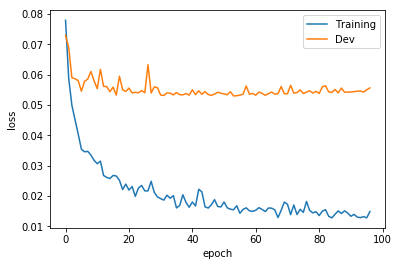

In [36]:
# plot metrics
plt.plot(history_cnn.history['rmse'][3:], label = 'Training')
plt.plot(history_cnn.history['val_rmse'][3:], label = 'Dev')
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

We can see that our model suffers from overfitting our training data. It does not generalize on the Dev dataset. Also we see the Dev data loss increasing aroin after around 80 epochs. We will try to reduce the number of epochs in the next step.

In [40]:
# Single Layer CNN

# create baseline CNN model with 1 convoluted layer with relu activation
# input is 96X96 pixel images with 1 channel(gray scale) -> (96, 96, 1) tensors
# applies 10 convolution filters of 3X3 each
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# Helper function to find RMSE(Root Mean Squared Error)
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model for the learning process
# 'adam' optimizer is used
model.compile(loss=rmse, optimizer='adam', metrics=[rmse])

# fit model with 13 epochs(best after trials) and batch size = 32 and using dev dataset as validation set
%time history_cnn_2 = model.fit(X_train_trim, Y_train_trim, epochs=13, shuffle=True, batch_size=32, validation_data=(X_dev_trim, Y_dev_trim), verbose=2)

# Summary of trained model
model.summary()

Train on 1692 samples, validate on 448 samples
Epoch 1/13
 - 1s - loss: 1.0271 - rmse: 1.0271 - val_loss: 0.1926 - val_rmse: 0.1926
Epoch 2/13
 - 1s - loss: 0.1214 - rmse: 0.1214 - val_loss: 0.0970 - val_rmse: 0.0970
Epoch 3/13
 - 1s - loss: 0.0964 - rmse: 0.0964 - val_loss: 0.0893 - val_rmse: 0.0893
Epoch 4/13
 - 1s - loss: 0.0761 - rmse: 0.0761 - val_loss: 0.0734 - val_rmse: 0.0734
Epoch 5/13
 - 1s - loss: 0.0635 - rmse: 0.0635 - val_loss: 0.0641 - val_rmse: 0.0641
Epoch 6/13
 - 1s - loss: 0.0600 - rmse: 0.0600 - val_loss: 0.0619 - val_rmse: 0.0619
Epoch 7/13
 - 1s - loss: 0.0504 - rmse: 0.0504 - val_loss: 0.0600 - val_rmse: 0.0600
Epoch 8/13
 - 1s - loss: 0.0500 - rmse: 0.0500 - val_loss: 0.0596 - val_rmse: 0.0596
Epoch 9/13
 - 1s - loss: 0.0443 - rmse: 0.0443 - val_loss: 0.0544 - val_rmse: 0.0544
Epoch 10/13
 - 1s - loss: 0.0426 - rmse: 0.0426 - val_loss: 0.0599 - val_rmse: 0.0599
Epoch 11/13
 - 1s - loss: 0.0445 - rmse: 0.0445 - val_loss: 0.0726 - val_rmse: 0.0726
Epoch 12/13
 - 1

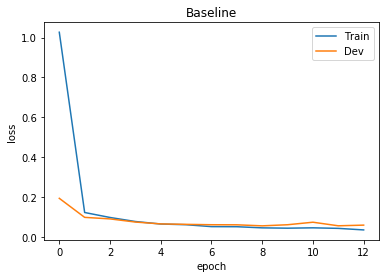

In [63]:
# plot metrics
plt.plot(history_cnn_2.history['rmse'], label = 'Train')
plt.plot(history_cnn_2.history['val_rmse'], label = 'Dev')
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('Baseline')
plt.show()

In [62]:
# look at final RMSE value after 13 epochs
#print("Dev Data RMSE: {:.3f}".format(sqrt(history_cnn_2.history.get('val_rmse')[-1]) * 48))
print("Baseline RMSE: {:.3f}".format(np.sqrt(history_cnn_2.history.get('rmse')[-1]) *48))

Baseline RMSE: 8.841


The loss looks much better with RMSE of 8.841 which will be our baseline. For our model to perform better and reduce overfitting we would need more training data. We plan to use several data augmentation techniques to enhance our training dataset. 

The Kaggle leaderboard RMSE score is 1.28 followed by 1.4. So we have a long way to go to explore better models and optimization techniques.  

In [49]:
# Predict on dev data
dev_predict = model.predict(X_dev_trim)

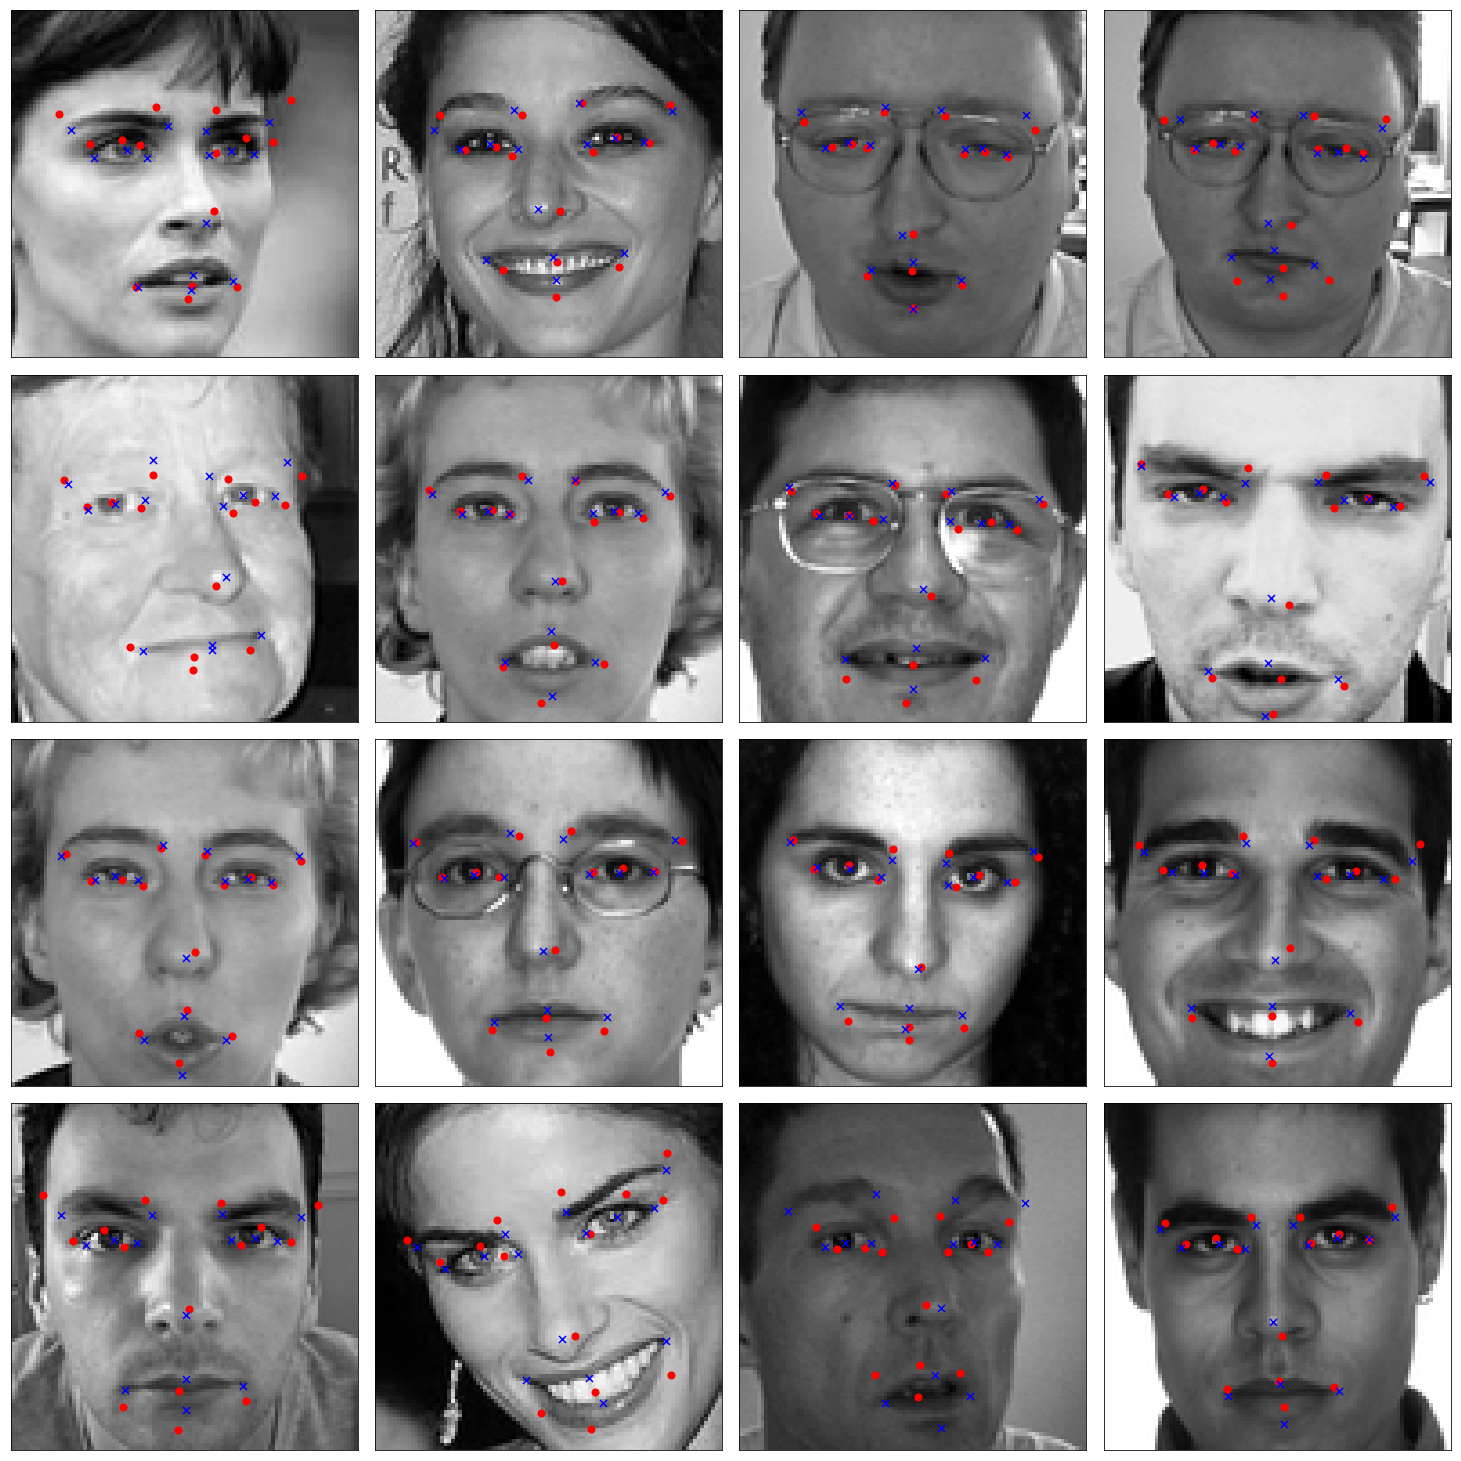

In [67]:
def plot_sample(x_dev, y_dev, y_dev_predict, axis):
    img = x_dev.reshape(96, 96)
    axis.imshow(img, cmap='gray')
   # plt.plot
    axis.scatter(y_dev_predict[0::2] * 48 + 48, y_dev_predict[1::2] * 48 + 48, marker='o', color = 'red', s=50, label = 'predict')
    axis.scatter(y_dev[0::2] * 48 + 48, y_dev[1::2] * 48 + 48, marker='x', color = 'blue', s=50, label = 'orig')

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_dev_trim[i], Y_dev_trim[i], dev_predict[i], ax)

plt.show()

### Next Steps

#### Dealing with Missing Values

* <b>Imputing missing values</b>
    
* <b>Build 2 datasets</b>
    * 1st model will train on 8 keypoint labels 
    * 2nd model will train on 22 keypoint labels
* <b>Data Augmentation</b>
    * Mirroring
    * Rotation
    * Blurring
    * Contrast Reduction




#### CNN Architectures

* LeNet-5
* AlexNet
* VGG
* Inception and GoogLeNet
* Residual Network or ResNet

#### Activation Functions

* ReLU
* LeakyReLU
* Randomized ReLU etc.

#### Batch size / Learning Rate

#### Other Techniques
* Early Stopping
* Dropout
* Specialist Models